# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 5: Population Dynamics
## 04.26.2019

In [199]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy import stats
import time
import random
from matplotlib.patches import Circle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
sns.set_style(style='whitegrid')

In [146]:
def mode_choose(file, mode, odeint):
    
    current_mode = ('..\\Release\\' + file + '.exe ' +
                    mode + ' ' +
                    odeint + ' '
                   )
                    
    if(file == 'popdin_log'):
        
        current_mode += (str(n_0) + ' ' +
                         str(k) + ' ' +
                         str(w_out) + ' ' +
                         str(w_in) + ' '
                        )
        
    elif(file == 'popdin_conlog'):
        current_mode += (str(n_0_1) + ' ' +
                         str(n_0_2) + ' ' +
                         str(k_1) + ' ' +
                         str(k_2) + ' ' +
                         str(w_out_1) + ' ' +
                         str(w_in_1) + ' ' +
                         str(w_out_2) + ' ' +
                         str(w_in_2) + ' ' +
                         str(alpha) + ' ' +
                         str(beta) + ' '
                        )
        
    elif(file == 'popdin_lv'):
        current_mode += (str(n_0_r) + ' ' +
                         str(n_0_f) + ' ' +
                         str(k) + ' ' +
                         str(s) + ' ' +
                         str(a) + ' ' +
                         str(b) + ' ' +
                         str(c) + ' ' +
                         str(d) + ' '
                        )
        
    else:
        print('fu')
                    
    current_mode += (str(sim_time) + ' ' +
                     str(dt) + ' ' +
                     str(accuracy)
                    )

    return(current_mode)

# Logistic model
### Initial conditions

In [117]:
n_0 = 10
k = 100
w_out = 0.3
w_in = 0.6

# Step size
dt = 1e-03
# Adaptive accuracy of simulation
accuracy = 1e-12

# Number of time units to plot
sim_time = 25

# Others
steps = 1
image_dpi = 150
image_format = 'pdf'
image_path = '..\\Documentation\\src\\images\\'

### Single run of logistic model

In [118]:
current_mode = mode_choose(file='popdin_log', mode='fixed', odeint='rkck')
os.system(current_mode)
data_fixed_log = np.genfromtxt('fixed.dat')

current_mode = mode_choose(file='popdin_log', mode='adaptive', odeint='rkck')
os.system(current_mode)
data_adaptive_log = np.genfromtxt('adaptive.dat')

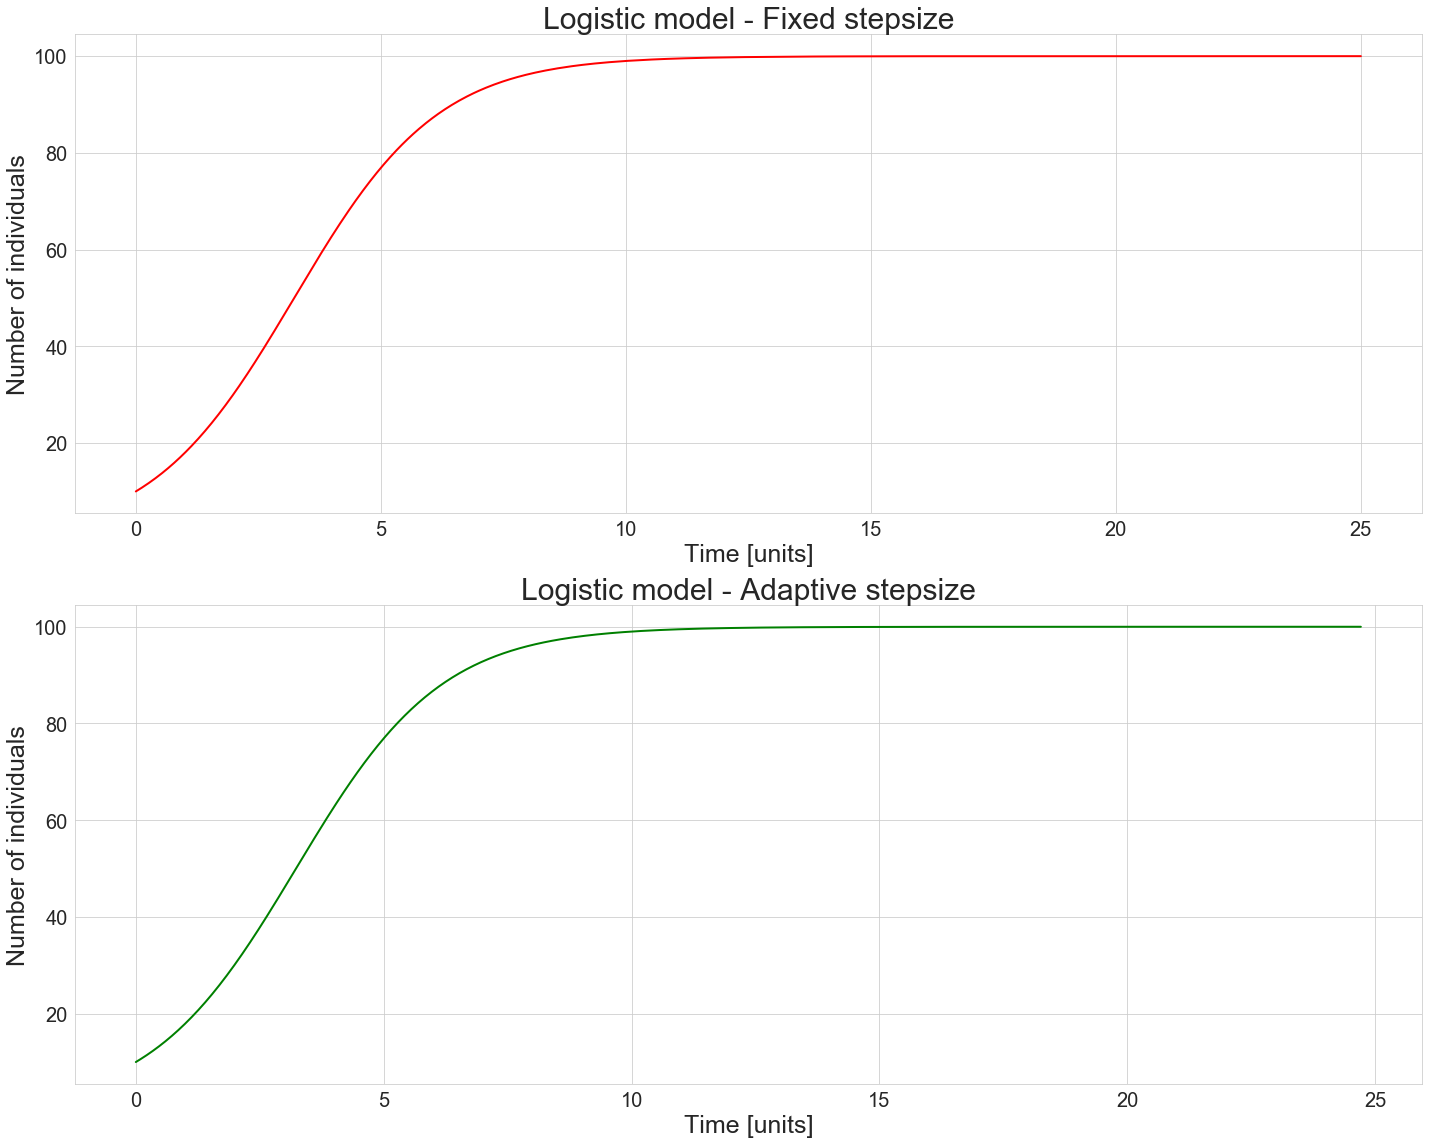

In [119]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 30
scattersize = 10

axes[0].plot(data_fixed[:,0], data_fixed[:,1],
         color='red', lw=2)

axes[1].plot(data_adaptive[:,0], data_adaptive[:,1],
         color='green', lw=2)

axes[0].set_title('Logistic model - Fixed stepsize', fontsize=titlesize)
axes[1].set_title('Logistic model - Adaptive stepsize', fontsize=titlesize)

for i in range(0, nrows):
    axes[i].set_xlabel('Time [units]', fontsize=axislabelsize)
    axes[i].set_ylabel('Number of individuals', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.show()

### Numerous runs of logistic model

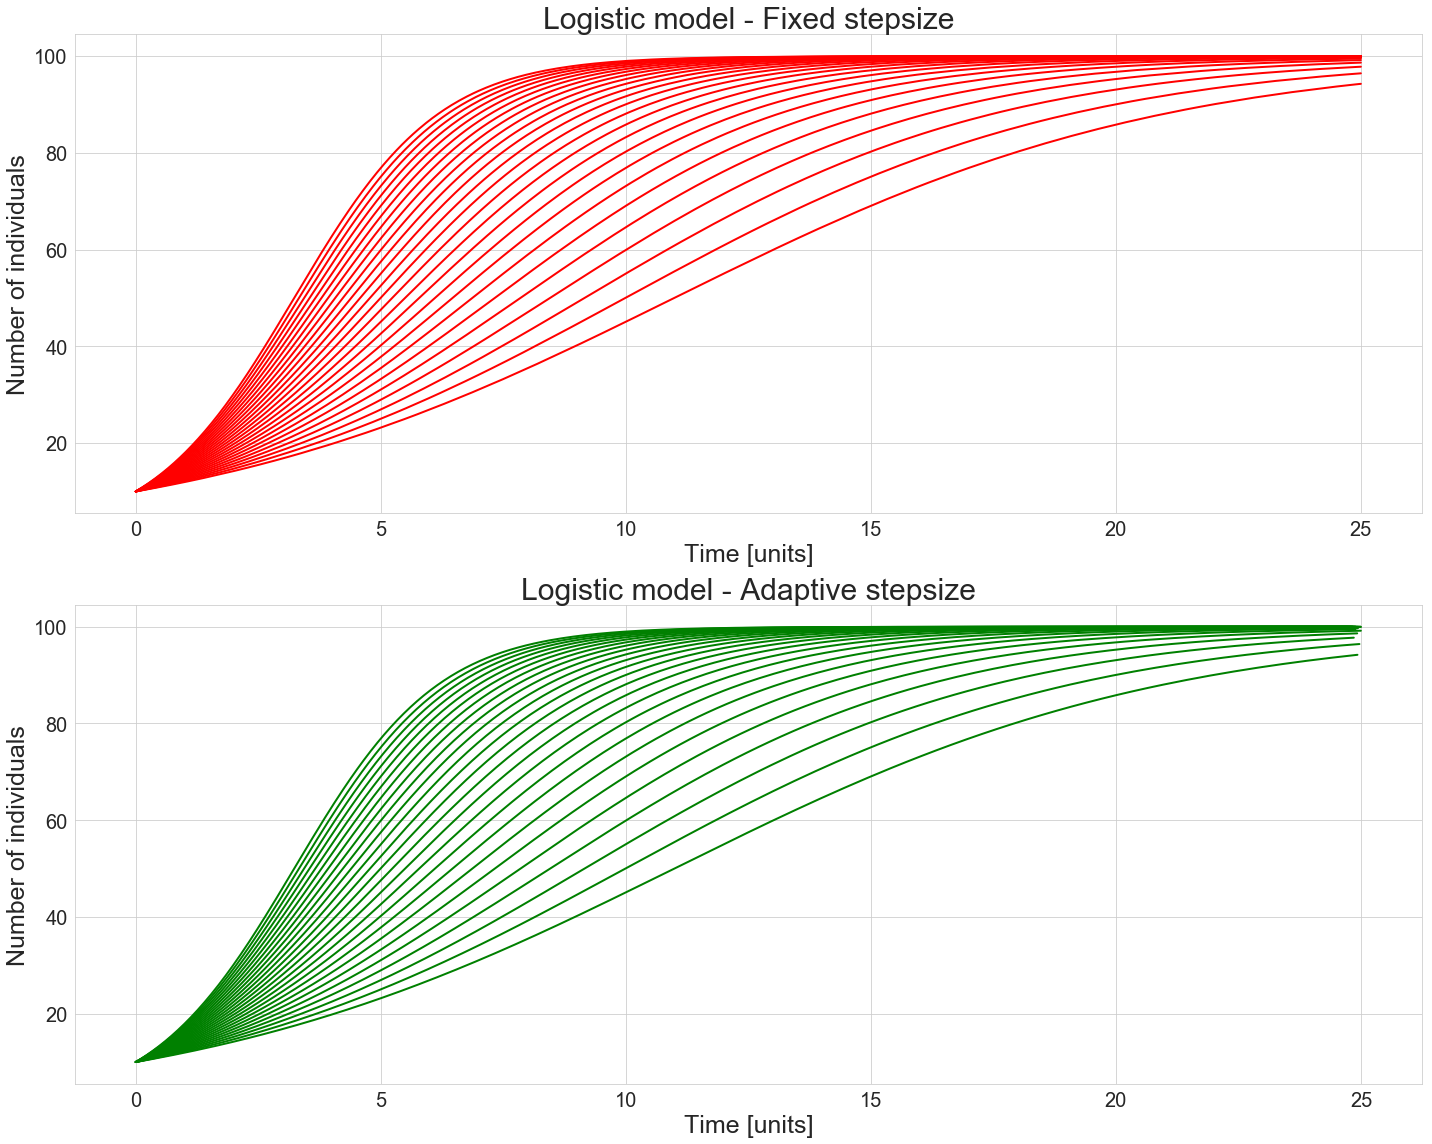

In [122]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 30
scattersize = 10

for i in [j/100 for j in range(50, 100)][::2]:

    w_out = 0.3
    w_in = i

    current_mode = mode_choose(file='popdin_log', mode='fixed', odeint='rkck')
    os.system(current_mode)
    data_fixed_log = np.genfromtxt('fixed.dat')

    current_mode = mode_choose(file='popdin_log', mode='adaptive', odeint='rkck')
    os.system(current_mode)
    data_adaptive_log = np.genfromtxt('adaptive.dat')
    
    axes[0].plot(data_fixed_log[:,0], data_fixed_log[:,1],
             color='red', lw=2)

    axes[1].plot(data_adaptive_log[:,0], data_adaptive_log[:,1],
             color='green', lw=2)

axes[0].set_title('Logistic model - Fixed stepsize', fontsize=titlesize)
axes[1].set_title('Logistic model - Adaptive stepsize', fontsize=titlesize)

for i in range(0, nrows):
    axes[i].set_xlabel('Time [units]', fontsize=axislabelsize)
    axes[i].set_ylabel('Number of individuals', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'logistic_model.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

### Runtime

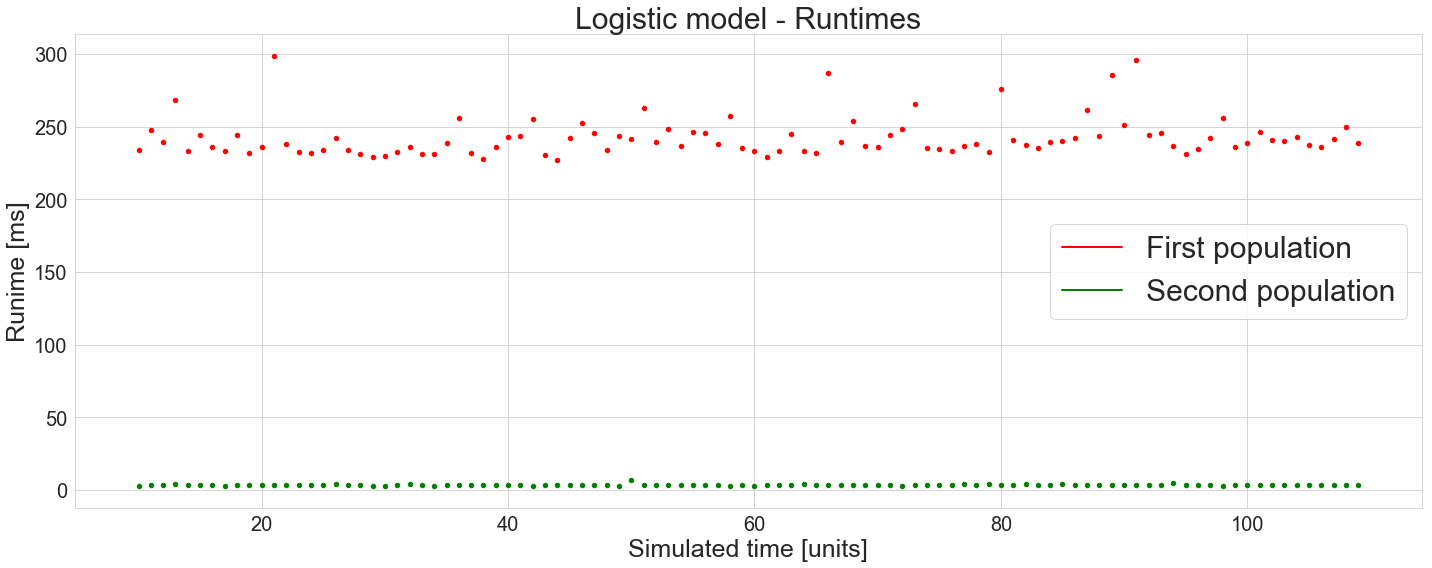

In [145]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 30
scattersize = 20

min_time = 10
runs_log = 100

runtimes_fixed = np.zeros((runs_log))
runtimes_adaptive = np.zeros((runs_log))

n_0 = 10
k = 100
w_out = 0.3
w_in = 0.6

for i in range(0, runs_log):
    
    sim_time_runs = min_time + i
    
    current_mode = mode_choose(file='popdin_log', mode='fixed', odeint='rkck')
    os.system(current_mode)
    data_fixed_log = np.genfromtxt('fixed.dat')

    current_mode = mode_choose(file='popdin_log', mode='adaptive', odeint='rkck')
    os.system(current_mode)
    data_adaptive_log = np.genfromtxt('adaptive.dat')
    
    runtimes_fixed[i] = data_fixed_log[-1,-1]
    runtimes_adaptive[i] = data_adaptive_log[-1,-1]

axes.scatter([k for k in range(min_time, min_time + runs_log)],
                runtimes_fixed/1000, color='red', s=scattersize)
axes.scatter([k for k in range(min_time, min_time + runs_log)],
                runtimes_adaptive/1000, color='green', s=scattersize)

axes.set_title('Logistic model - Runtimes', fontsize=titlesize)

axes.set_xlabel('Simulated time [units]', fontsize=axislabelsize)
axes.set_ylabel('Runime [ms]', fontsize=axislabelsize)

axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(handles=legend_elements, fontsize=legendsize)

fig.tight_layout()
plt.savefig(image_path +
            'logistic_model_runtime.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

# Connected logistic model
### Initial conditions

In [123]:
n_0_1 = 10
n_0_2 = 20
k_1 = 100
k_2 = 100
w_out_1 = 0.3
w_in_1 = 0.6
w_out_2 = 0.3
w_in_2 = 0.6
alpha = 0.1
beta = 0.9

# Step size
dt = 1e-03
# Adaptive accuracy of simulation
accuracy = 1e-12

# Number of time units to plot
sim_time = 25

### Single run of the con-log model

In [124]:
current_mode = mode_choose(file='popdin_conlog', mode='fixed', odeint='rkck')
os.system(current_mode)
data_fixed_conlog = np.genfromtxt('fixed.dat')

current_mode = mode_choose(file='popdin_conlog', mode='adaptive', odeint='rkck')
os.system(current_mode)
data_adaptive_conlog = np.genfromtxt('adaptive.dat')

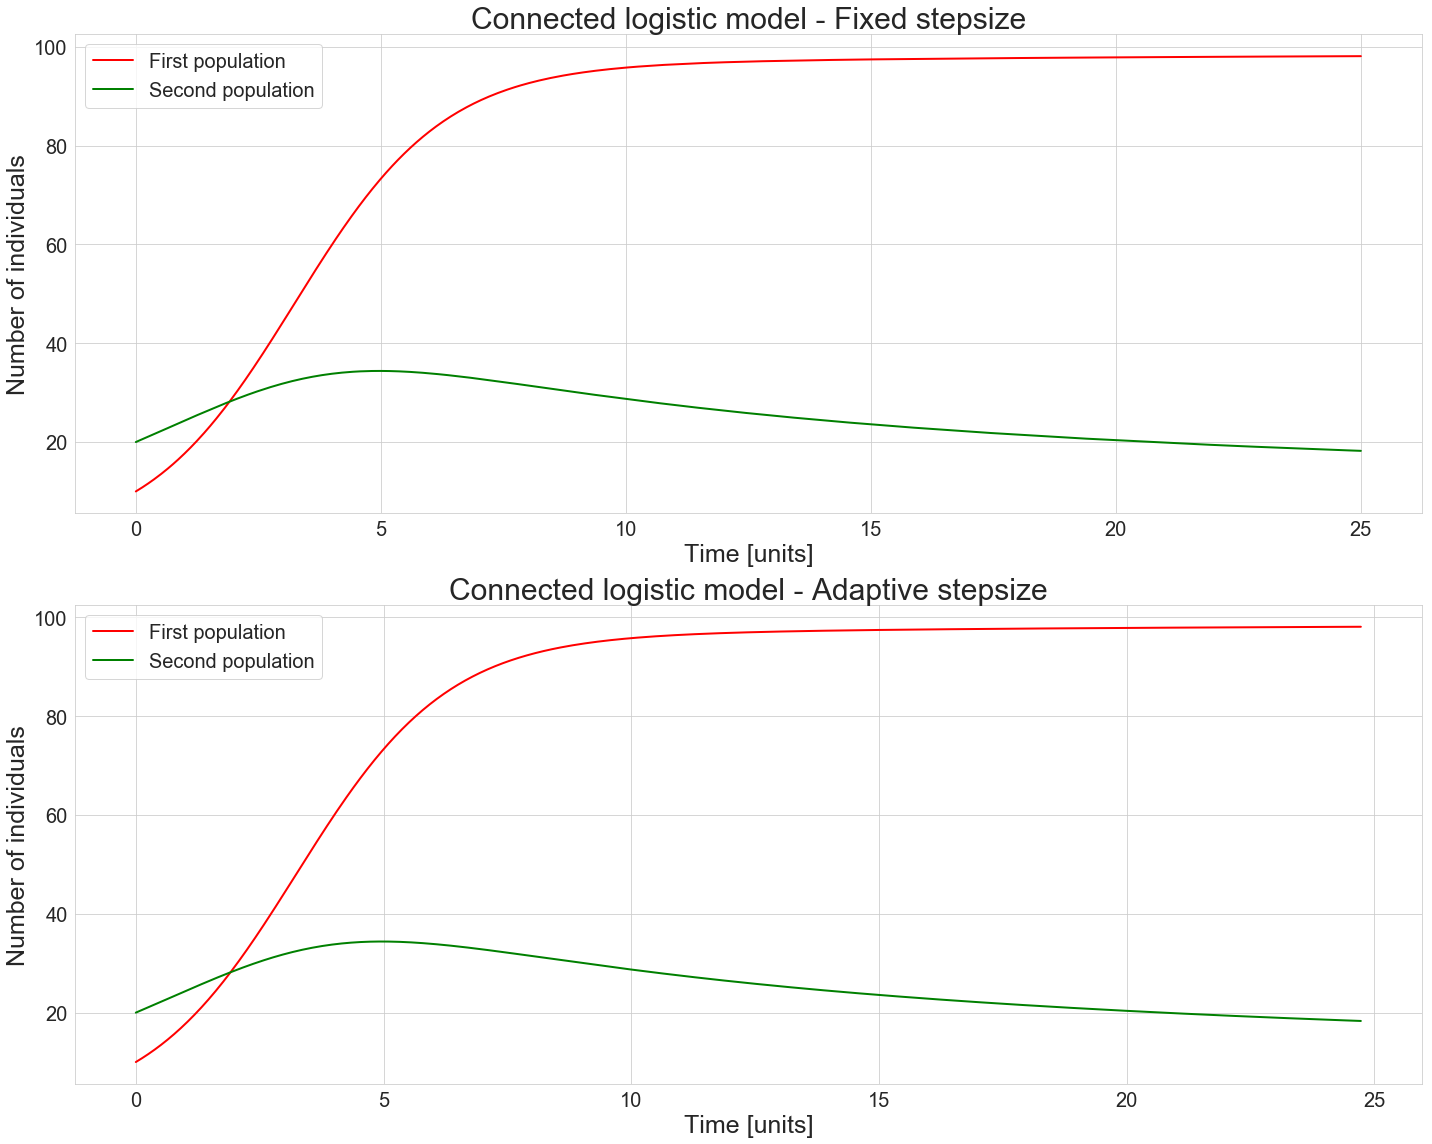

In [135]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 20
scattersize = 10

axes[0].plot(data_fixed_conlog[:,0], data_fixed_conlog[:,1],
         color='red', lw=2)

axes[0].plot(data_fixed_conlog[:,0], data_fixed_conlog[:,2],
         color='green', lw=2)

axes[1].plot(data_adaptive_conlog[:,0], data_adaptive_conlog[:,1],
         color='red', lw=2)

axes[1].plot(data_adaptive_conlog[:,0], data_adaptive_conlog[:,2],
         color='green', lw=2)

axes[0].set_title('Connected logistic model - Fixed stepsize', fontsize=titlesize)
axes[1].set_title('Connected logistic model - Adaptive stepsize', fontsize=titlesize)

legend_elements = [Line2D([0], [0], color='red', lw=2, label='First population'),
                   Line2D([0], [0], color='green', lw=2, label='Second population')]

for i in range(0, nrows):
    axes[i].set_xlabel('Time [units]', fontsize=axislabelsize)
    axes[i].set_ylabel('Number of individuals', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)
    
    axes[i].legend(handles=legend_elements, fontsize=legendsize)

fig.tight_layout()
plt.show()

### Numerous runs of the con-log model

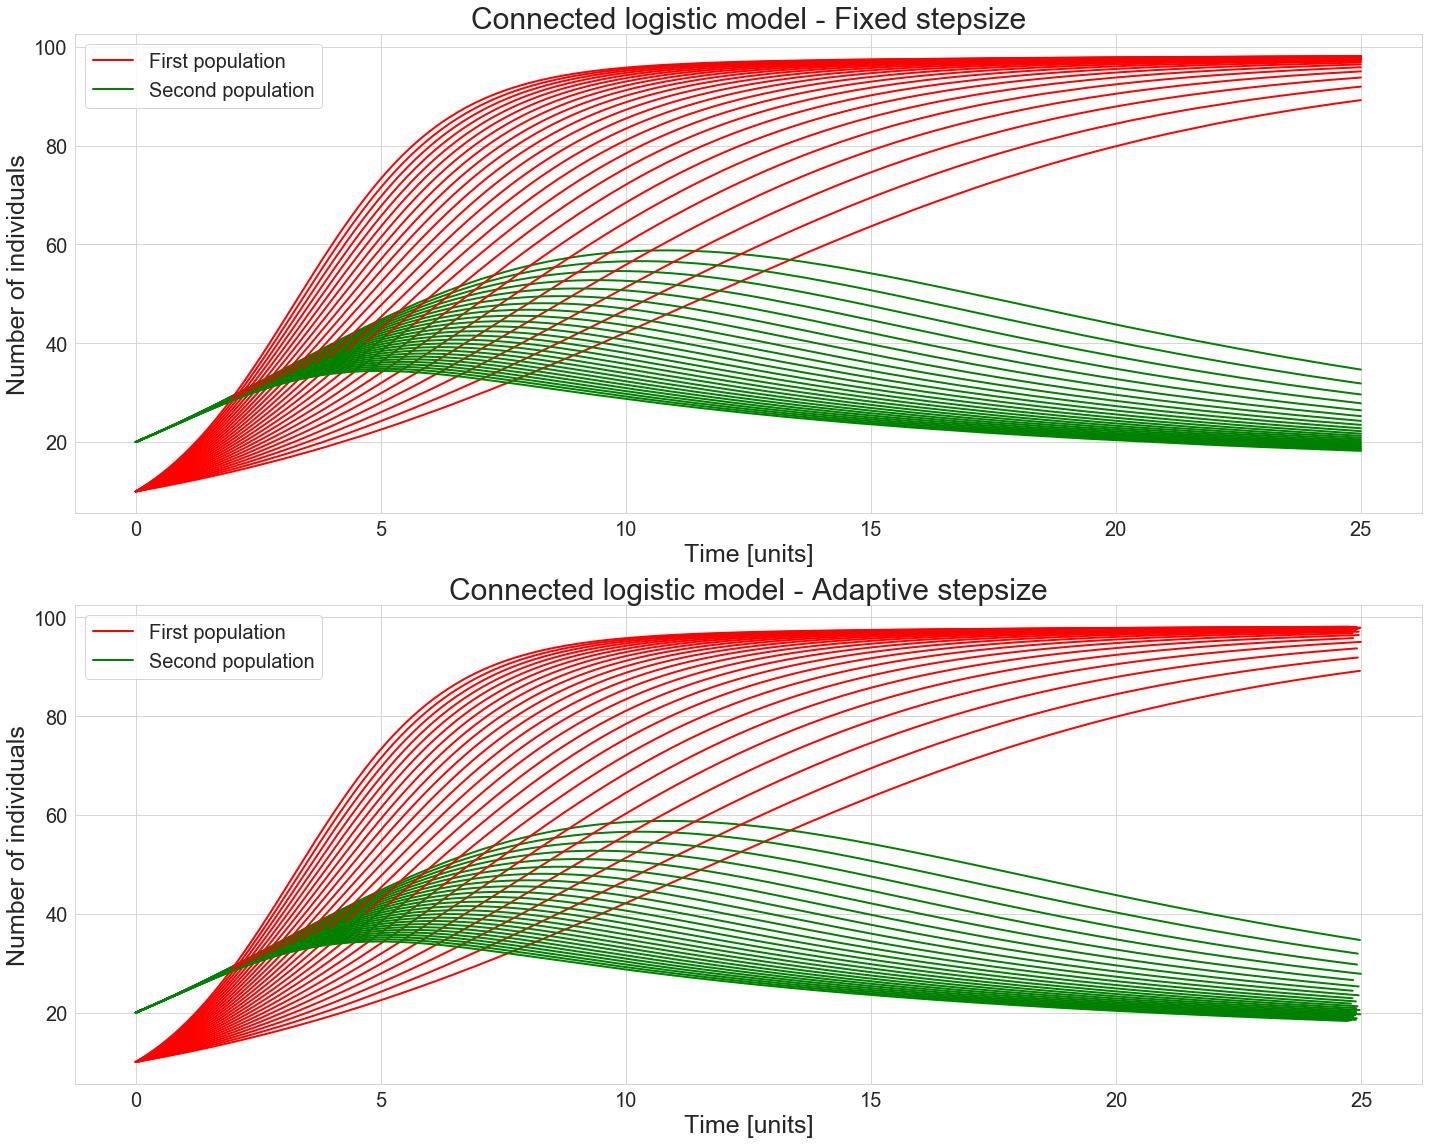

In [134]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 20
scattersize = 10

for i in [j/100 for j in range(50, 100)][::2]:

    w_out_1 = 0.3
    w_in_1 = i
    
    w_out_2 = 0.3
    w_in_2 = 0.6

    current_mode = mode_choose(file='popdin_conlog', mode='fixed', odeint='rkck')
    os.system(current_mode)
    data_fixed_conlog = np.genfromtxt('fixed.dat')

    current_mode = mode_choose(file='popdin_conlog', mode='adaptive', odeint='rkck')
    os.system(current_mode)
    data_adaptive_conlog = np.genfromtxt('adaptive.dat')
    
    axes[0].plot(data_fixed_conlog[:,0], data_fixed_conlog[:,1],
             color='red', lw=2)
    
    axes[0].plot(data_fixed_conlog[:,0], data_fixed_conlog[:,2],
             color='green', lw=2)

    axes[1].plot(data_adaptive_conlog[:,0], data_adaptive_conlog[:,1],
             color='red', lw=2)
    
    axes[1].plot(data_adaptive_conlog[:,0], data_adaptive_conlog[:,2],
             color='green', lw=2)

axes[0].set_title('Connected logistic model - Fixed stepsize', fontsize=titlesize)
axes[1].set_title('Connected logistic model - Adaptive stepsize', fontsize=titlesize)

legend_elements = [Line2D([0], [0], color='red', lw=2, label='First population'),
                   Line2D([0], [0], color='green', lw=2, label='Second population')]

for i in range(0, nrows):
    axes[i].set_xlabel('Time [units]', fontsize=axislabelsize)
    axes[i].set_ylabel('Number of individuals', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)
    
    axes[i].legend(handles=legend_elements, fontsize=legendsize)

fig.tight_layout()
plt.savefig(image_path +
            'connected_logistic_model.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

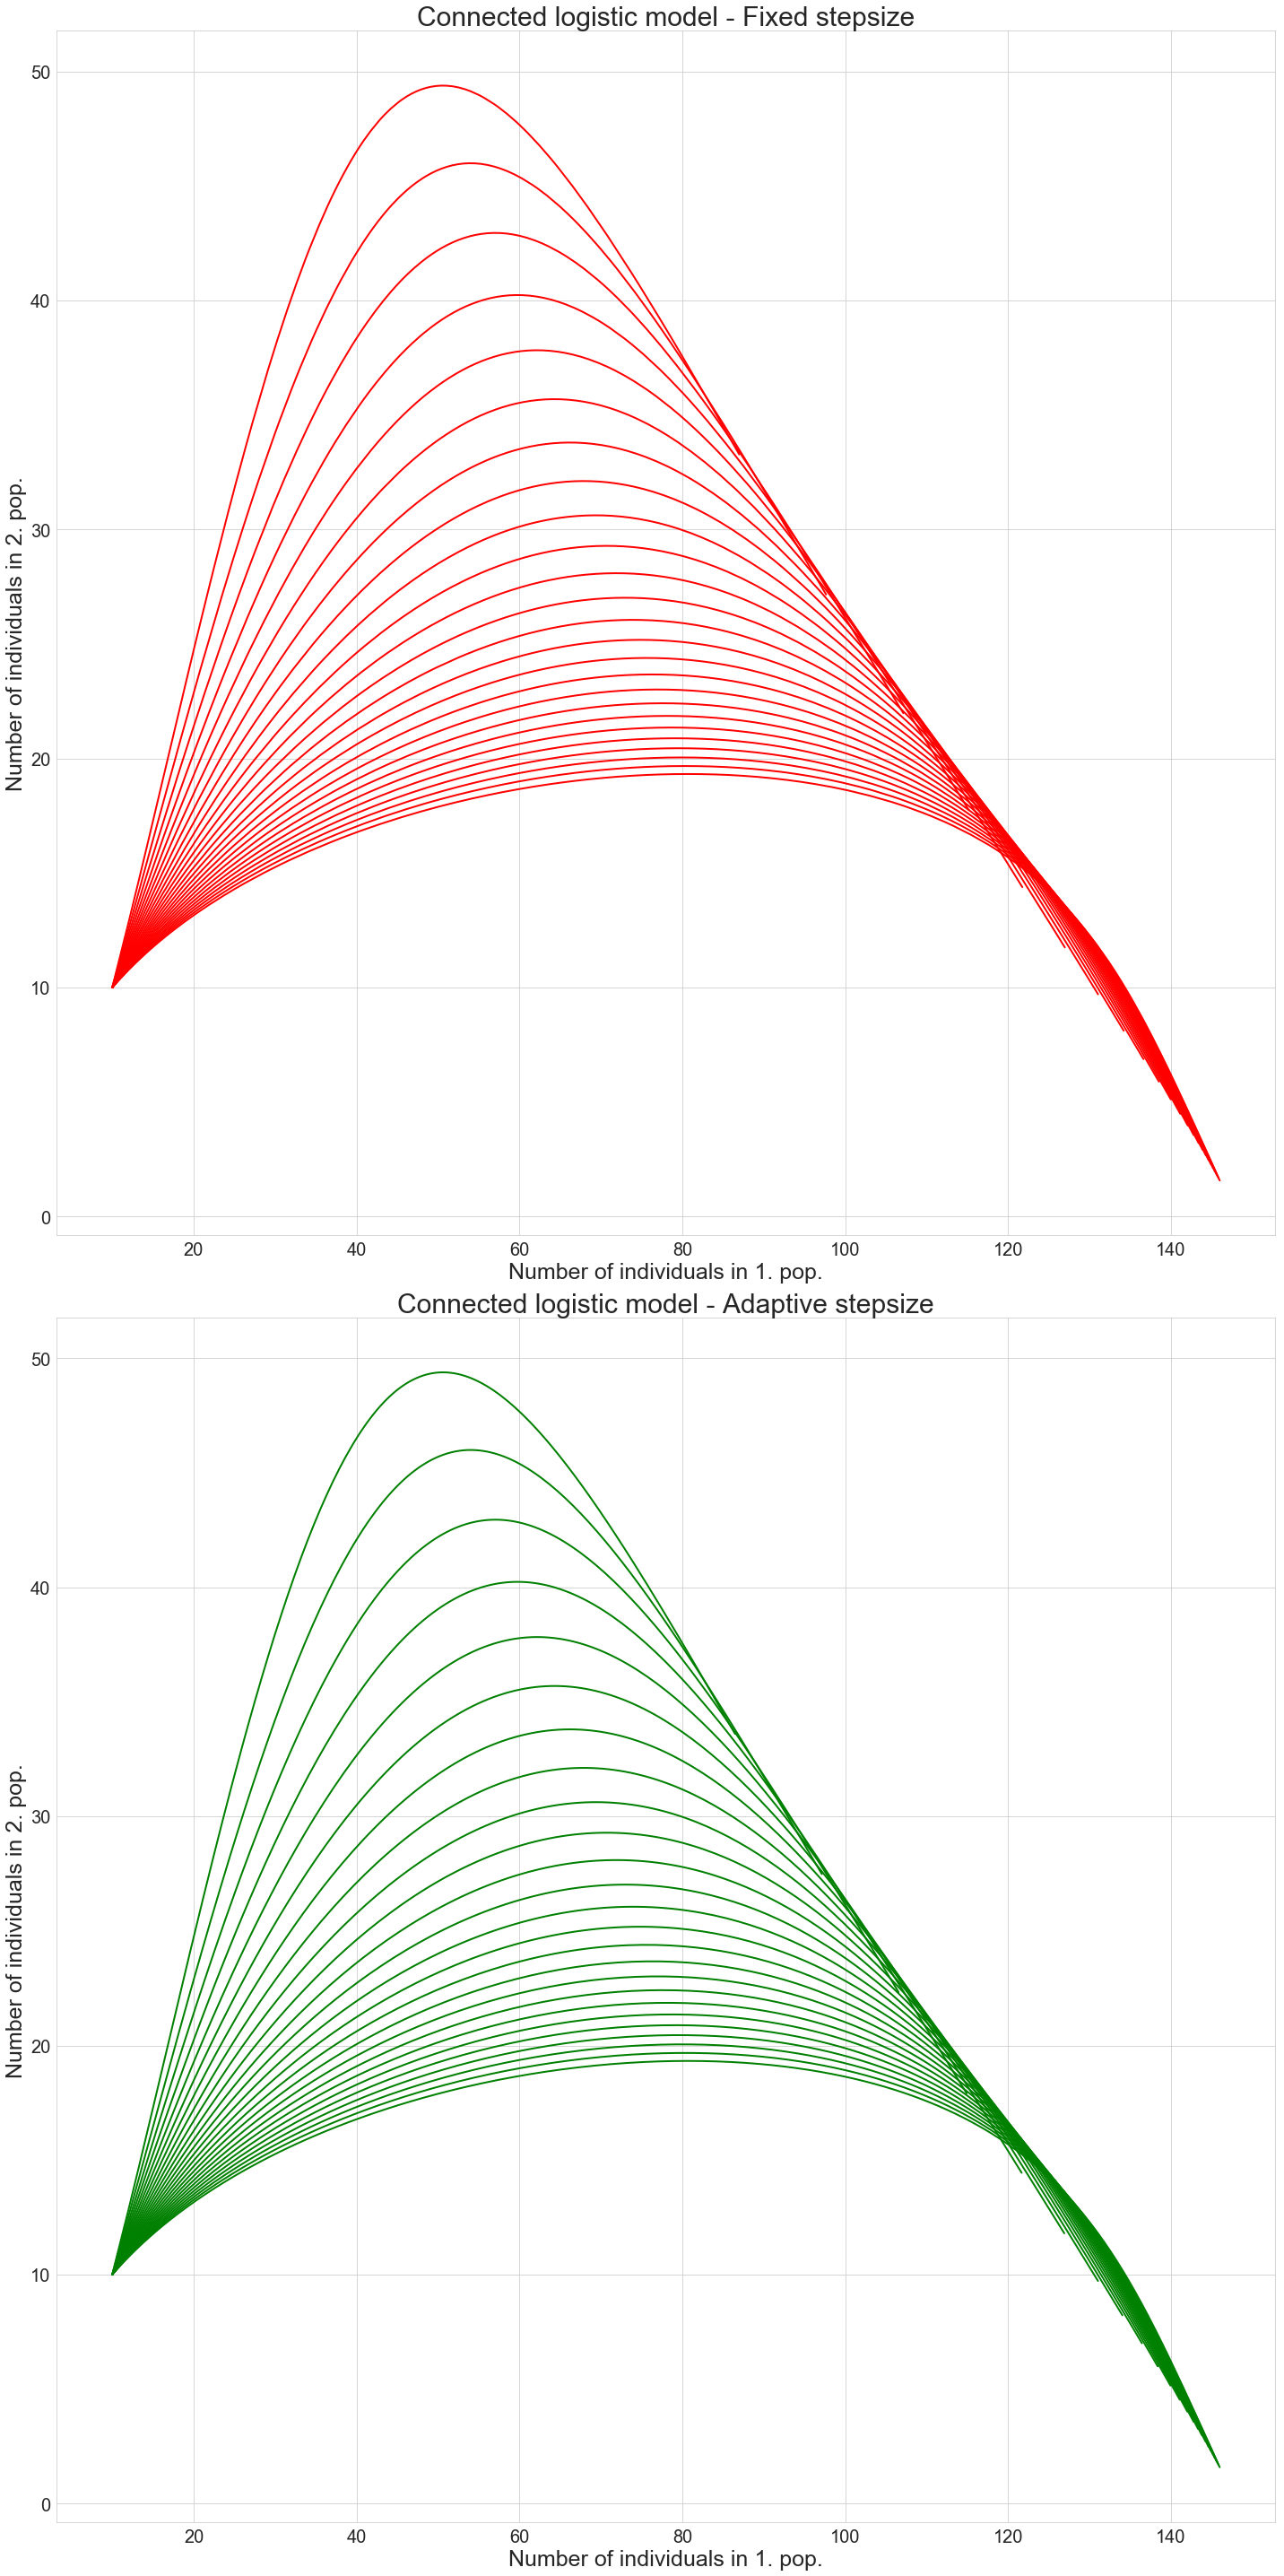

In [142]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*20))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 30
scattersize = 10

for i in [j/100 for j in range(50, 100)][::2]:

    w_out_1 = 0.3
    w_in_1 = i
    
    w_out_2 = 0.3
    w_in_2 = 0.6

    current_mode = mode_choose(file='popdin_conlog', mode='fixed', odeint='rkck')
    os.system(current_mode)
    data_fixed_conlog = np.genfromtxt('fixed.dat')

    current_mode = mode_choose(file='popdin_conlog', mode='adaptive', odeint='rkck')
    os.system(current_mode)
    data_adaptive_conlog = np.genfromtxt('adaptive.dat')
    
    axes[0].plot(data_fixed_conlog[:,1], data_fixed_conlog[:,2],
             color='red', lw=2)

    axes[1].plot(data_adaptive_conlog[:,1], data_adaptive_conlog[:,2],
             color='green', lw=2)

axes[0].set_title('Connected logistic model - Fixed stepsize', fontsize=titlesize)
axes[1].set_title('Connected logistic model - Adaptive stepsize', fontsize=titlesize)

for i in range(0, nrows):
    axes[i].set_xlabel('Number of individuals in 1. pop.', fontsize=axislabelsize)
    axes[i].set_ylabel('Number of individuals in 2. pop.', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'connected_logistic_model_animals.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

### Stability

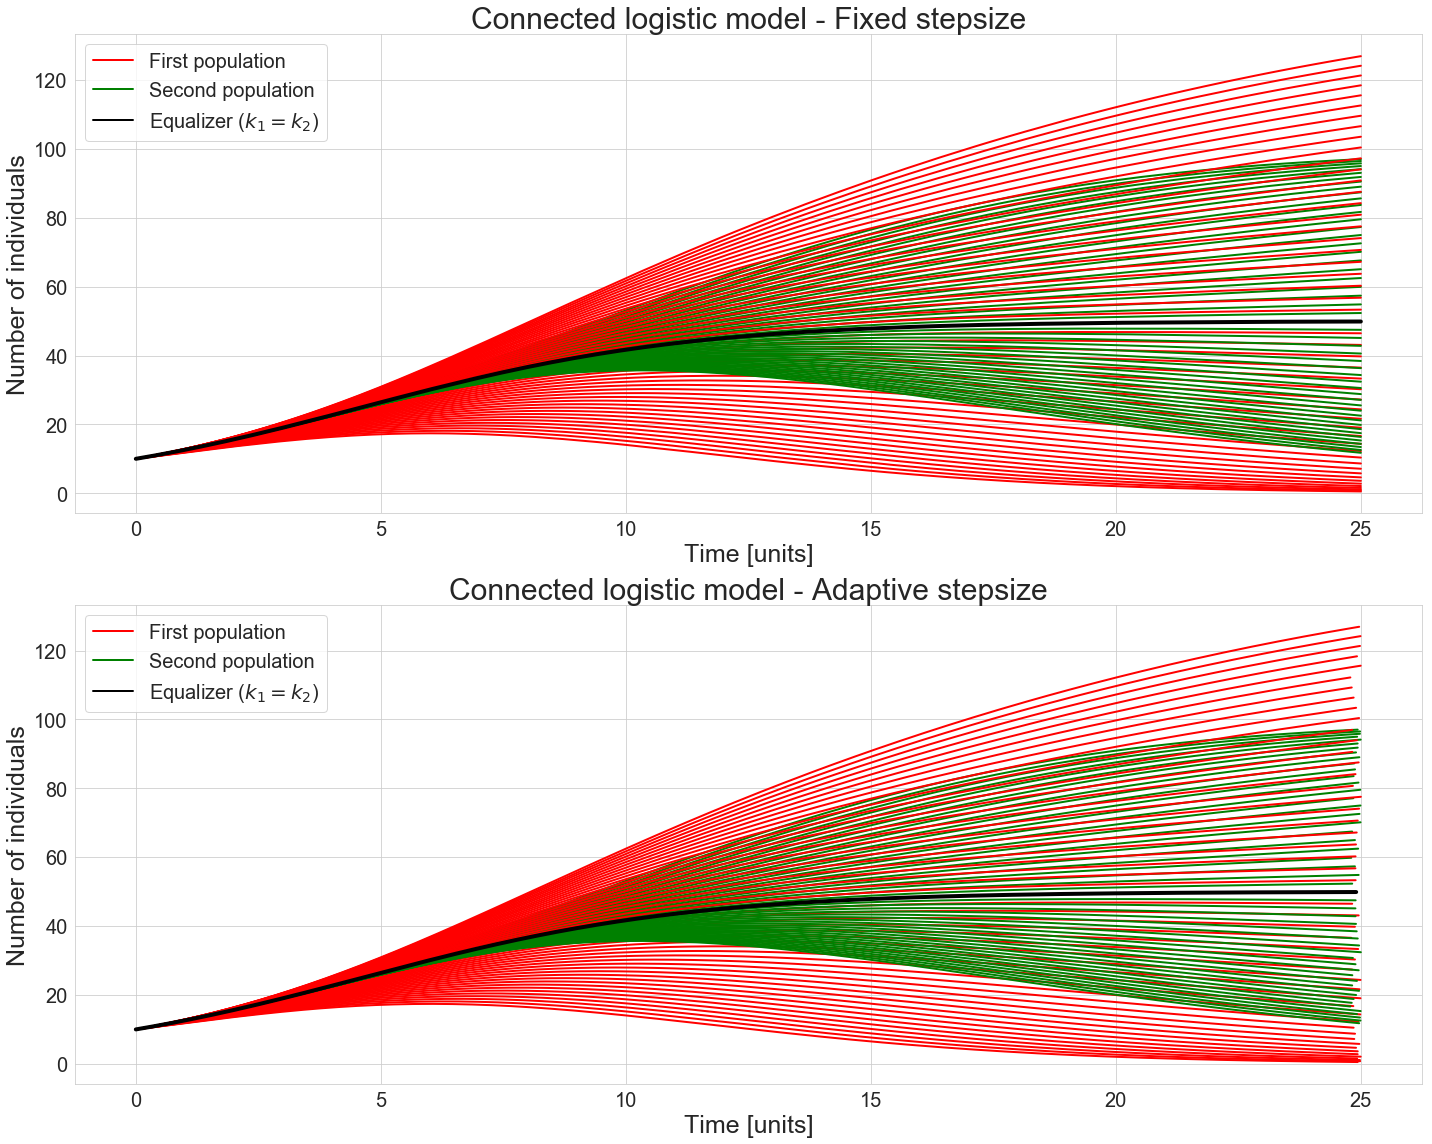

In [111]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 20
scattersize = 10

for i in [j for j in range(0, 100)][::2]:

    n_0_1 = 10
    n_0_2 = 10
    
    alpha = 1
    beta = 1
    
    w_out_1 = 0.3
    w_in_1 = 0.6
    w_out_2 = 0.3
    w_in_2 = 0.6
    
    k_1 = 50 + i
    k_2 = 100

    current_mode = mode_choose(file='popdin_conlog', mode='fixed', odeint='rkck')
    os.system(current_mode)
    data_fixed_conlog = np.genfromtxt('fixed.dat')

    current_mode = mode_choose(file='popdin_conlog', mode='adaptive', odeint='rkck')
    os.system(current_mode)
    data_adaptive_conlog = np.genfromtxt('adaptive.dat')
    
    axes[0].plot(data_fixed_conlog[:,0], data_fixed_conlog[:,1],
             color='red', lw=2)
    
    axes[0].plot(data_fixed_conlog[:,0], data_fixed_conlog[:,2],
             color='green', lw=2)

    axes[1].plot(data_adaptive_conlog[:,0], data_adaptive_conlog[:,1],
             color='red', lw=2)
    
    axes[1].plot(data_adaptive_conlog[:,0], data_adaptive_conlog[:,2],
             color='green', lw=2)
    
# Draw equalizer
k_1 = 100
k_2 = 100
current_mode = mode_choose(file='popdin_conlog', mode='fixed', odeint='rkck')
os.system(current_mode)
data_fixed_conlog = np.genfromtxt('fixed.dat')

current_mode = mode_choose(file='popdin_conlog', mode='adaptive', odeint='rkck')
os.system(current_mode)
data_adaptive_conlog = np.genfromtxt('adaptive.dat')

axes[0].plot(data_fixed_conlog[:,0], data_fixed_conlog[:,1],
             color='black', lw=4)

axes[1].plot(data_adaptive_conlog[:,0], data_adaptive_conlog[:,1],
         color='black', lw=4)


axes[0].set_title('Connected logistic model - Fixed stepsize', fontsize=titlesize)
axes[1].set_title('Connected logistic model - Adaptive stepsize', fontsize=titlesize)

legend_elements = [Line2D([0], [0], color='red', lw=2, label='First population'),
                   Line2D([0], [0], color='green', lw=2, label='Second population'),
                   Line2D([0], [0], color='black', lw=2, label='Equalizer ($k_{1} = k_{2}$)')]

for i in range(0, nrows):
    axes[i].set_xlabel('Time [units]', fontsize=axislabelsize)
    axes[i].set_ylabel('Number of individuals', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)
    
    axes[i].legend(handles=legend_elements, fontsize=legendsize)
    
fig.tight_layout()
plt.savefig(image_path +
            'connected_logistic_model_stability.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

### Pop1-Pop2 field for stability probe

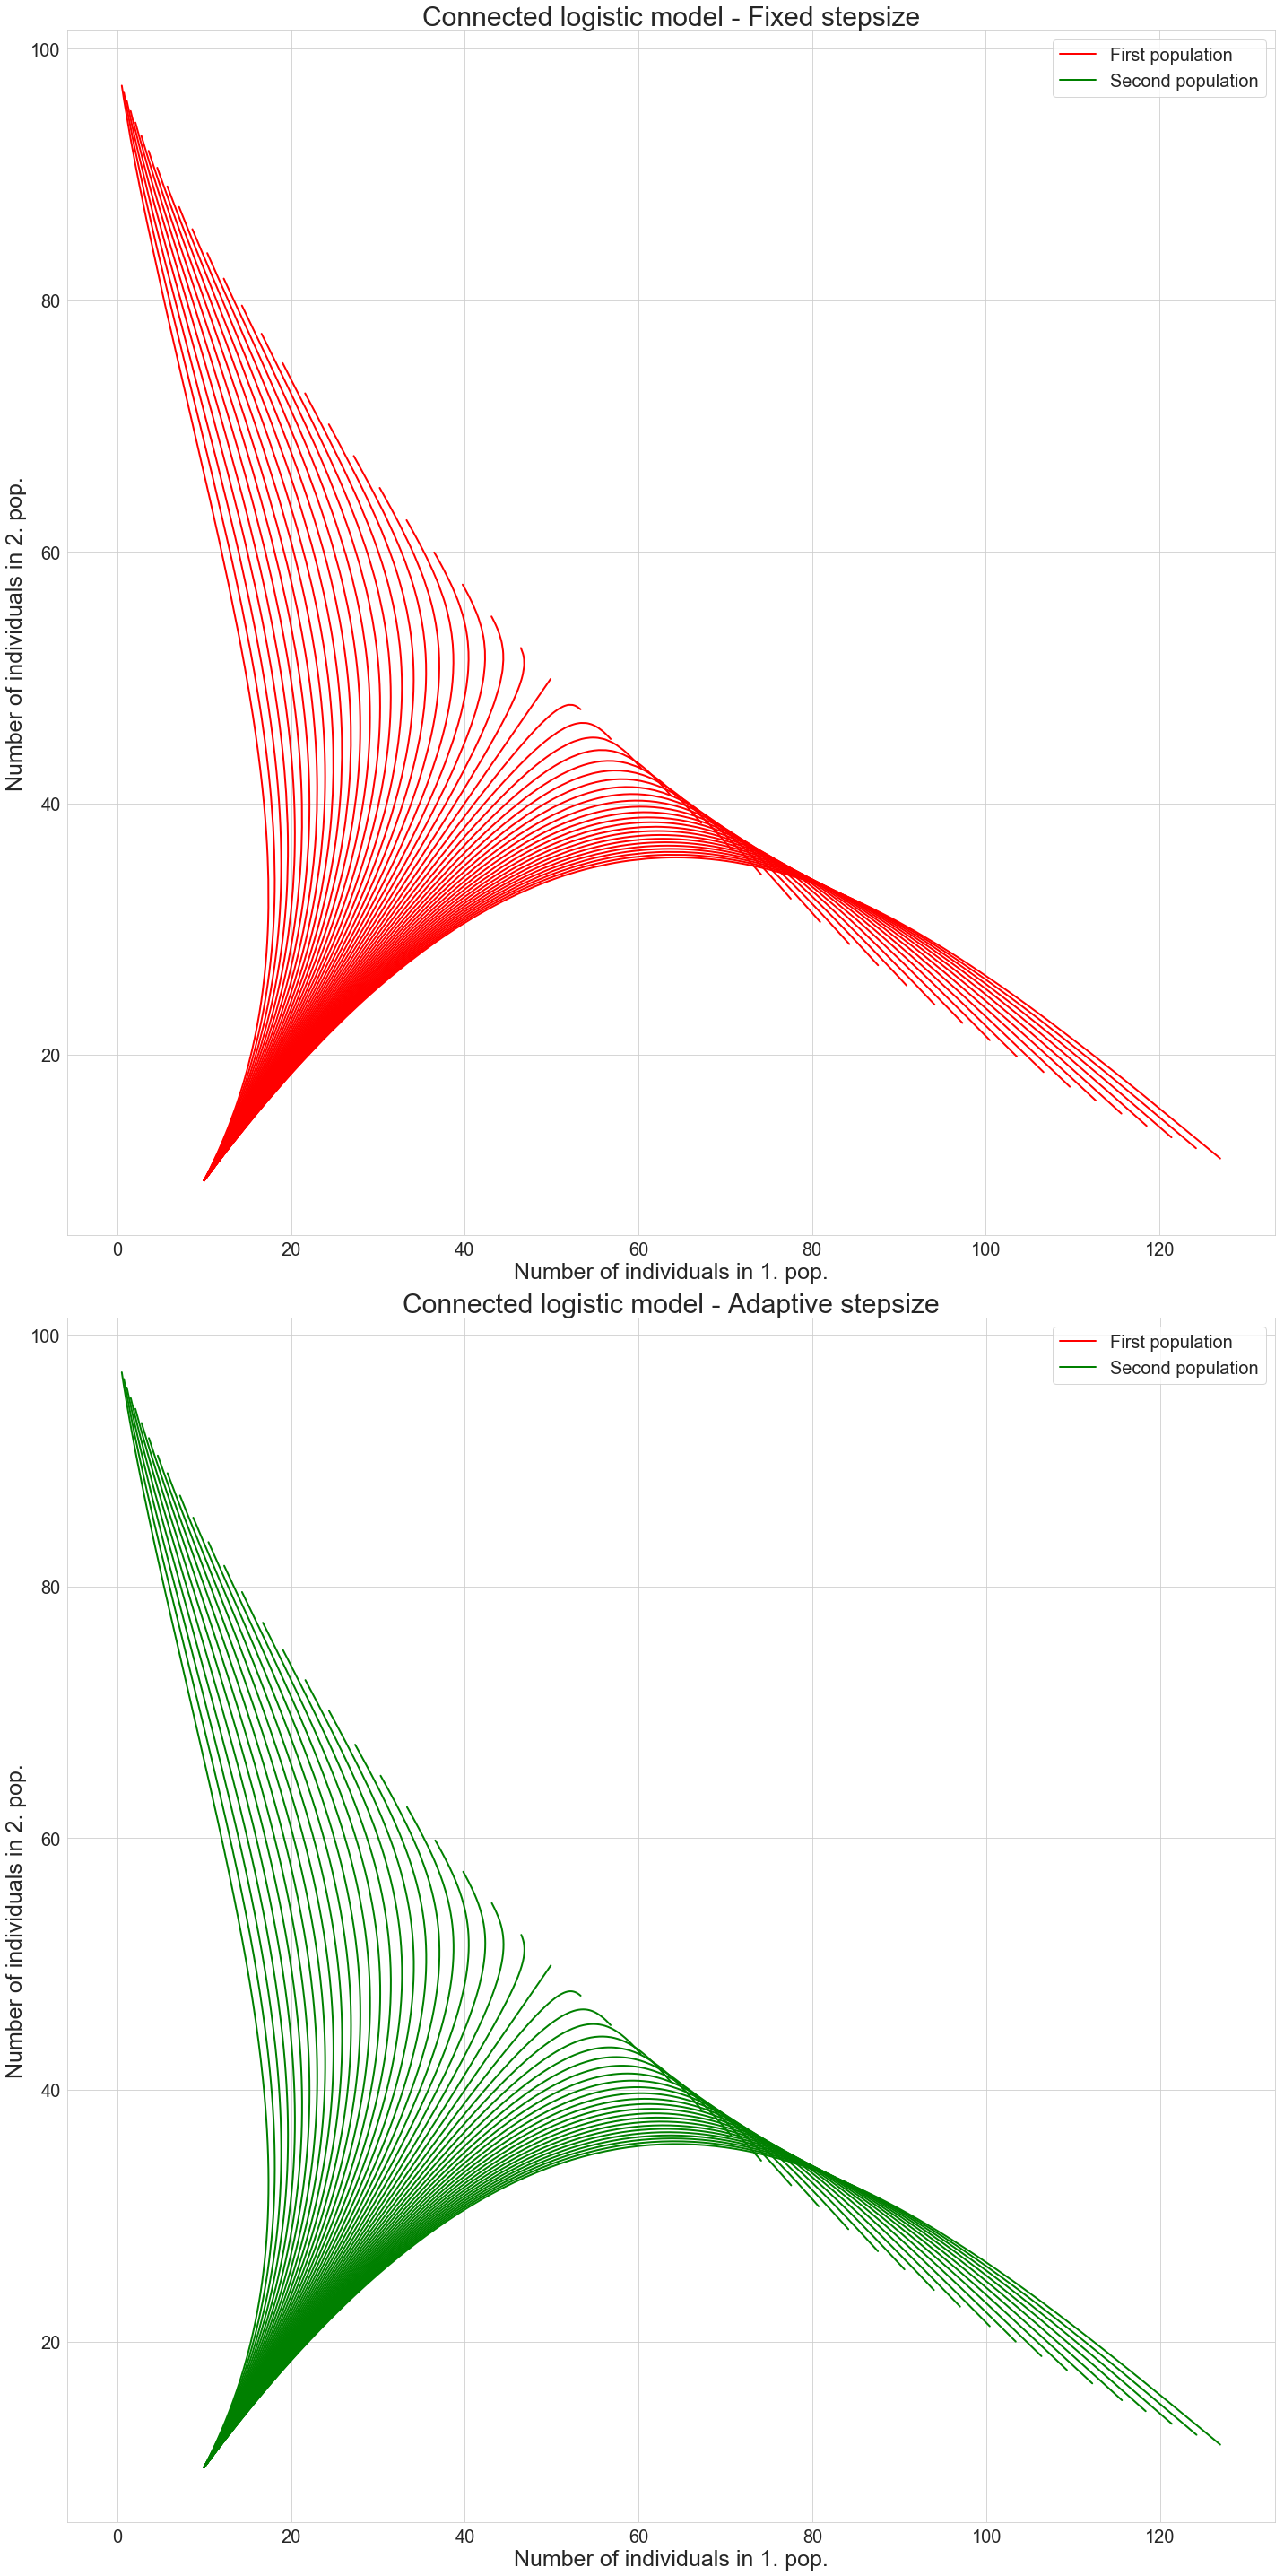

In [143]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*20))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 20
scattersize = 10

for i in [j for j in range(0, 100)][::2]:

    n_0_1 = 10
    n_0_2 = 10
    
    alpha = 1
    beta = 1
    
    w_out_1 = 0.3
    w_in_1 = 0.6
    w_out_2 = 0.3
    w_in_2 = 0.6
    
    k_1 = 50 + i
    k_2 = 100

    current_mode = mode_choose(file='popdin_conlog', mode='fixed', odeint='rkck')
    os.system(current_mode)
    data_fixed_conlog = np.genfromtxt('fixed.dat')

    current_mode = mode_choose(file='popdin_conlog', mode='adaptive', odeint='rkck')
    os.system(current_mode)
    data_adaptive_conlog = np.genfromtxt('adaptive.dat')
    
    axes[0].plot(data_fixed_conlog[:,1], data_fixed_conlog[:,2],
             color='red', lw=2)
    
    axes[1].plot(data_adaptive_conlog[:,1], data_adaptive_conlog[:,2],
             color='green', lw=2)

axes[0].set_title('Connected logistic model - Fixed stepsize', fontsize=titlesize)
axes[1].set_title('Connected logistic model - Adaptive stepsize', fontsize=titlesize)

legend_elements = [Line2D([0], [0], color='red', lw=2, label='First population'),
                   Line2D([0], [0], color='green', lw=2, label='Second population')]

for i in range(0, nrows):
    axes[i].set_xlabel('Number of individuals in 1. pop.', fontsize=axislabelsize)
    axes[i].set_ylabel('Number of individuals in 2. pop.', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)
    
    axes[i].legend(handles=legend_elements, fontsize=legendsize)
    
fig.tight_layout()
plt.savefig(image_path +
            'connected_logistic_model_stability_animals.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

# Lotka-Volterra-modell
### Initial conditions

In [243]:
n_0_r = 400
n_0_f = 200
k = 1e30
s = 0
a = 0.4
b = 0.004
c = 0.004
d = 0.9

# Step size
dt = 1e-03
# Adaptive accuracy of simulation
accuracy = 1e-12

# Number of time units to plot
sim_time = 100

### Single run of the LV model

In [244]:
current_mode = mode_choose(file='popdin_lv', mode='fixed', odeint='rkck')
os.system(current_mode)
data_fixed_lv = np.genfromtxt('fixed.dat')

current_mode = mode_choose(file='popdin_lv', mode='adaptive', odeint='rkck')
os.system(current_mode)
data_adaptive_lv = np.genfromtxt('adaptive.dat')

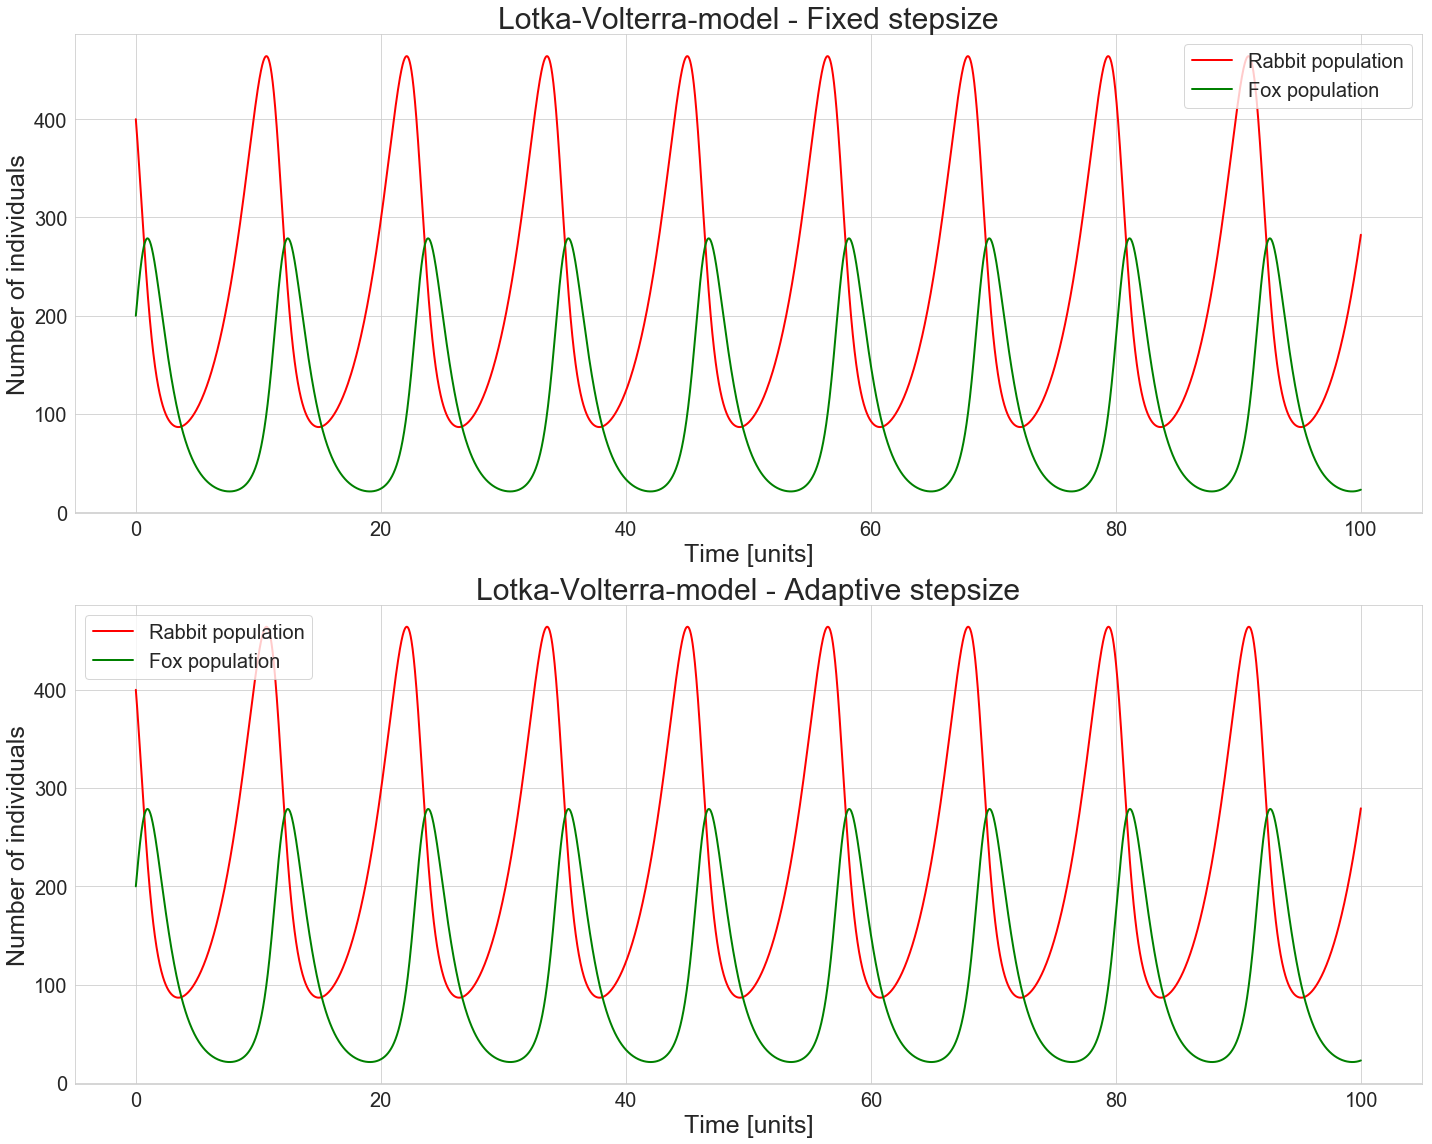

In [245]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 20
scattersize = 10

axes[0].plot(data_fixed_lv[:,0], data_fixed_lv[:,1],
         color='red', lw=2)

axes[0].plot(data_fixed_lv[:,0], data_fixed_lv[:,2],
         color='green', lw=2)

axes[1].plot(data_adaptive_lv[:,0], data_adaptive_lv[:,1],
         color='red', lw=2)

axes[1].plot(data_adaptive_lv[:,0], data_adaptive_lv[:,2],
         color='green', lw=2)

axes[0].set_title('Lotka-Volterra-model - Fixed stepsize', fontsize=titlesize)
axes[1].set_title('Lotka-Volterra-model - Adaptive stepsize', fontsize=titlesize)

legend_elements = [Line2D([0], [0], color='red', lw=2, label='Rabbit population'),
                   Line2D([0], [0], color='green', lw=2, label='Fox population')]

for i in range(0, nrows):
    axes[i].set_xlabel('Time [units]', fontsize=axislabelsize)
    axes[i].set_ylabel('Number of individuals', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)
    
    axes[i].legend(handles=legend_elements, fontsize=legendsize)

fig.tight_layout()
plt.savefig(image_path +
            'lv_model.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

### Numerous runs of the LV model

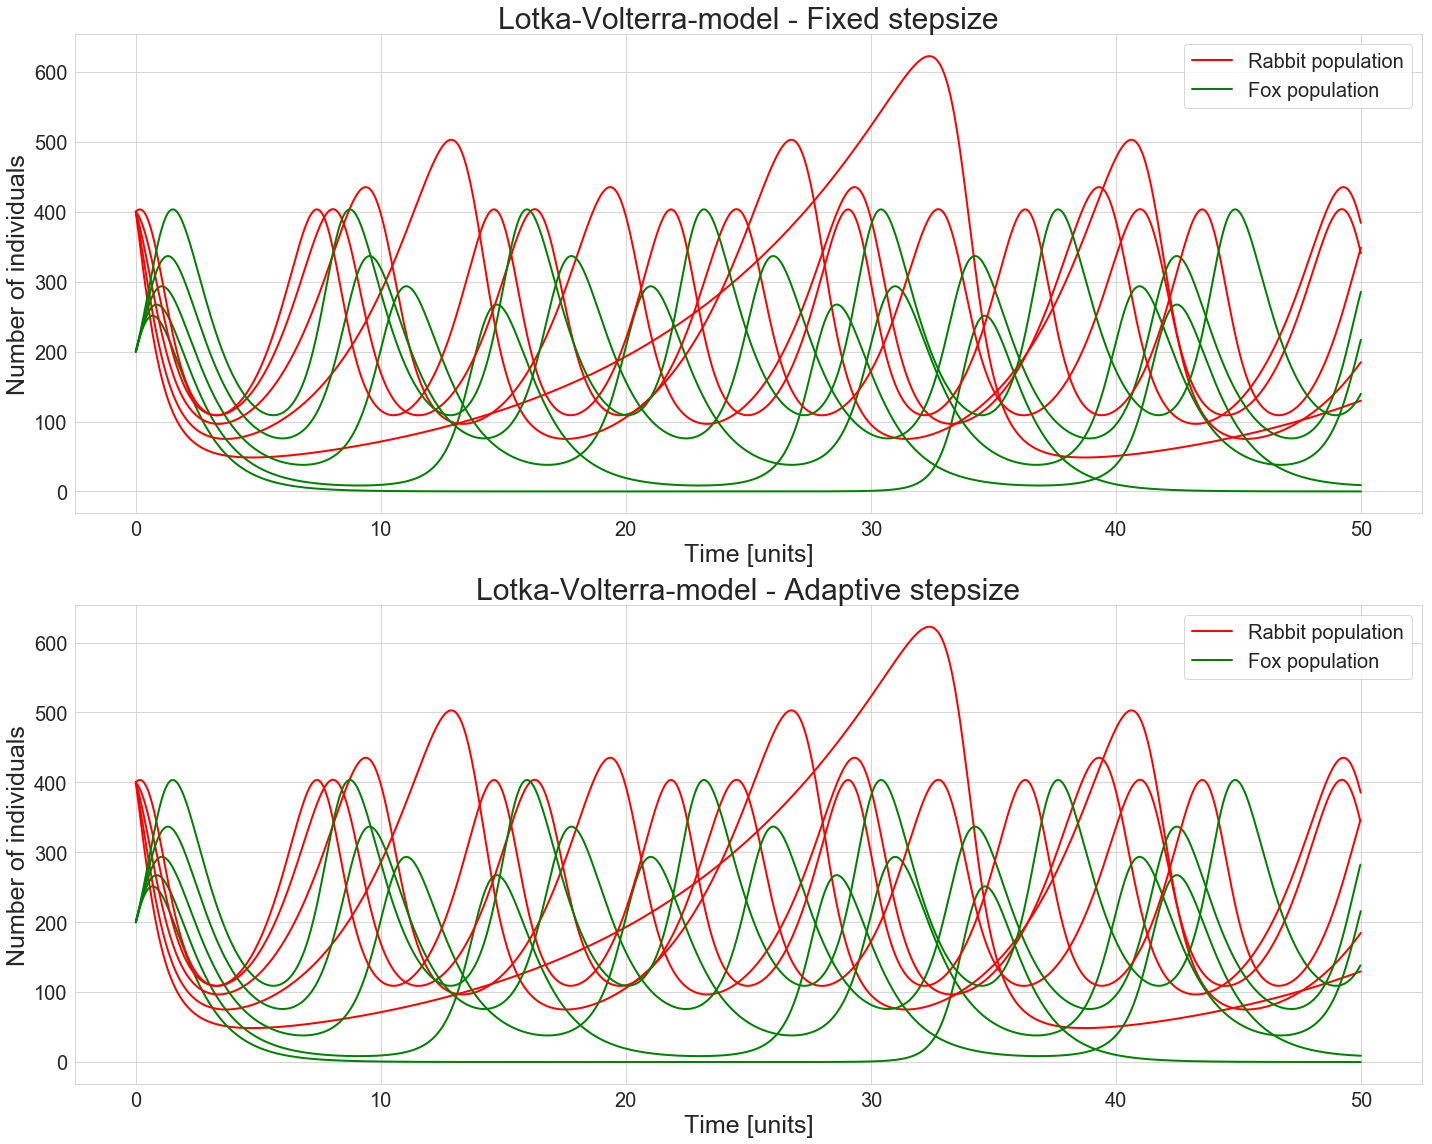

In [221]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 20
scattersize = 10

for i in [j/100 for j in range(0, 100)][::20]:
    
    a = 0.1 + i

    current_mode = mode_choose(file='popdin_lv', mode='fixed', odeint='rkck')
    os.system(current_mode)
    data_fixed_lv = np.genfromtxt('fixed.dat')

    current_mode = mode_choose(file='popdin_lv', mode='adaptive', odeint='rkck')
    os.system(current_mode)
    data_adaptive_lv = np.genfromtxt('adaptive.dat')
    
    axes[0].plot(data_fixed_lv[:,0], data_fixed_lv[:,1],
             color='red', lw=2)
    
    axes[0].plot(data_fixed_lv[:,0], data_fixed_lv[:,2],
             color='green', lw=2)

    axes[1].plot(data_adaptive_lv[:,0], data_adaptive_lv[:,1],
             color='red', lw=2)
    
    axes[1].plot(data_adaptive_lv[:,0], data_adaptive_lv[:,2],
             color='green', lw=2)

axes[0].set_title('Lotka-Volterra-model - Fixed stepsize', fontsize=titlesize)
axes[1].set_title('Lotka-Volterra-model - Adaptive stepsize', fontsize=titlesize)

legend_elements = [Line2D([0], [0], color='red', lw=2, label='Rabbit population'),
                   Line2D([0], [0], color='green', lw=2, label='Fox population')]

for i in range(0, nrows):
    axes[i].set_xlabel('Time [units]', fontsize=axislabelsize)
    axes[i].set_ylabel('Number of individuals', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)
    
    axes[i].legend(handles=legend_elements, fontsize=legendsize)

fig.tight_layout()
plt.savefig(image_path +
            'lv_model_more.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

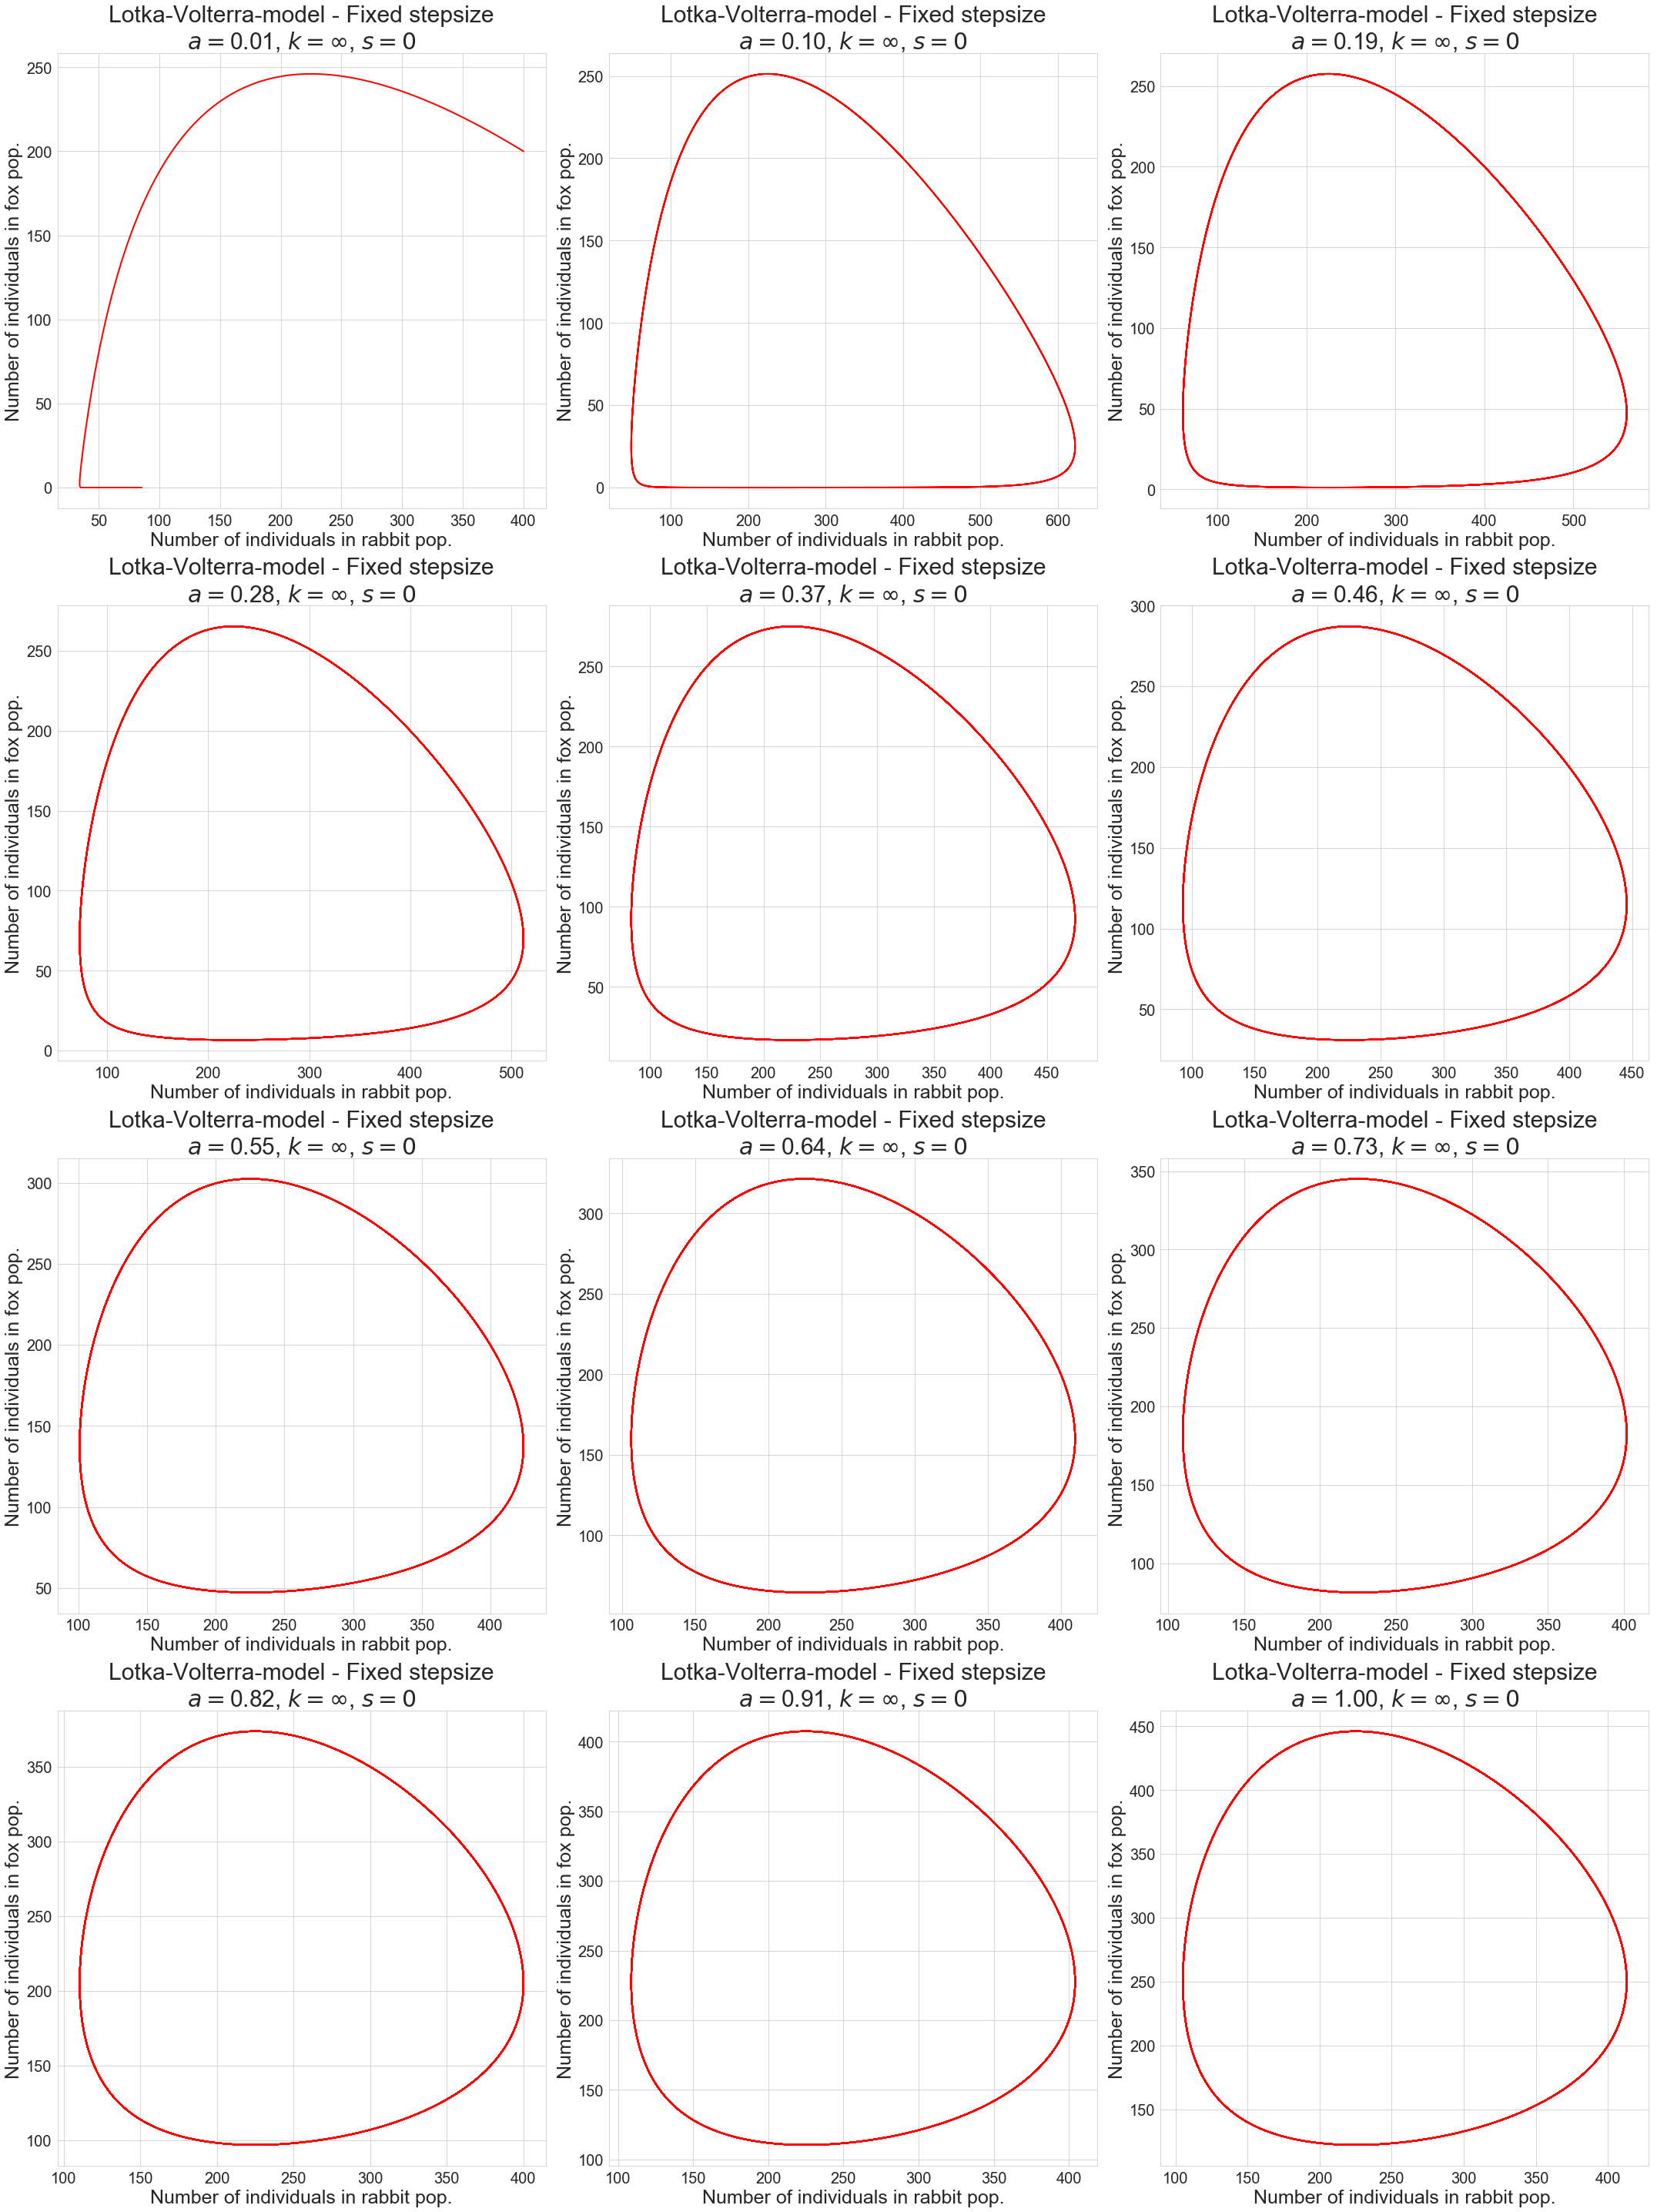

In [242]:
nrows = 4
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 20
scattersize = 10

places = [j/100 for j in range(0, 100, 9)]

count = 0
for i in places:

    n_0_r = 400
    n_0_f = 200
    k = 1e30
    s = 0
    a = 0.01 + i
    b = 0.004
    c = 0.004
    d = 0.9

    current_mode = mode_choose(file='popdin_lv', mode='fixed', odeint='rkck')
    os.system(current_mode)
    data_fixed_lv = np.genfromtxt('fixed.dat')
    
    axes[count//ncols][count%ncols].plot(data_fixed_lv[:,1], data_fixed_lv[:,2],
                                         color='red', lw=2)

    axes[count//ncols][count%ncols].set_title('Lotka-Volterra-model - Fixed stepsize\n$a = ${0:.2f}, $k = \\infty$, $s = 0$'.format(a),
                                              fontsize=titlesize)
    
    axes[count//ncols][count%ncols].set_xlabel('Number of individuals in rabbit pop.', fontsize=axislabelsize)
    axes[count//ncols][count%ncols].set_ylabel('Number of individuals in fox pop.', fontsize=axislabelsize)

    axes[count//ncols][count%ncols].tick_params(axis='both', which='major', labelsize=axisticksize)
    
    count += 1

fig.tight_layout()
plt.savefig(image_path +
            'lv_model_animals.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

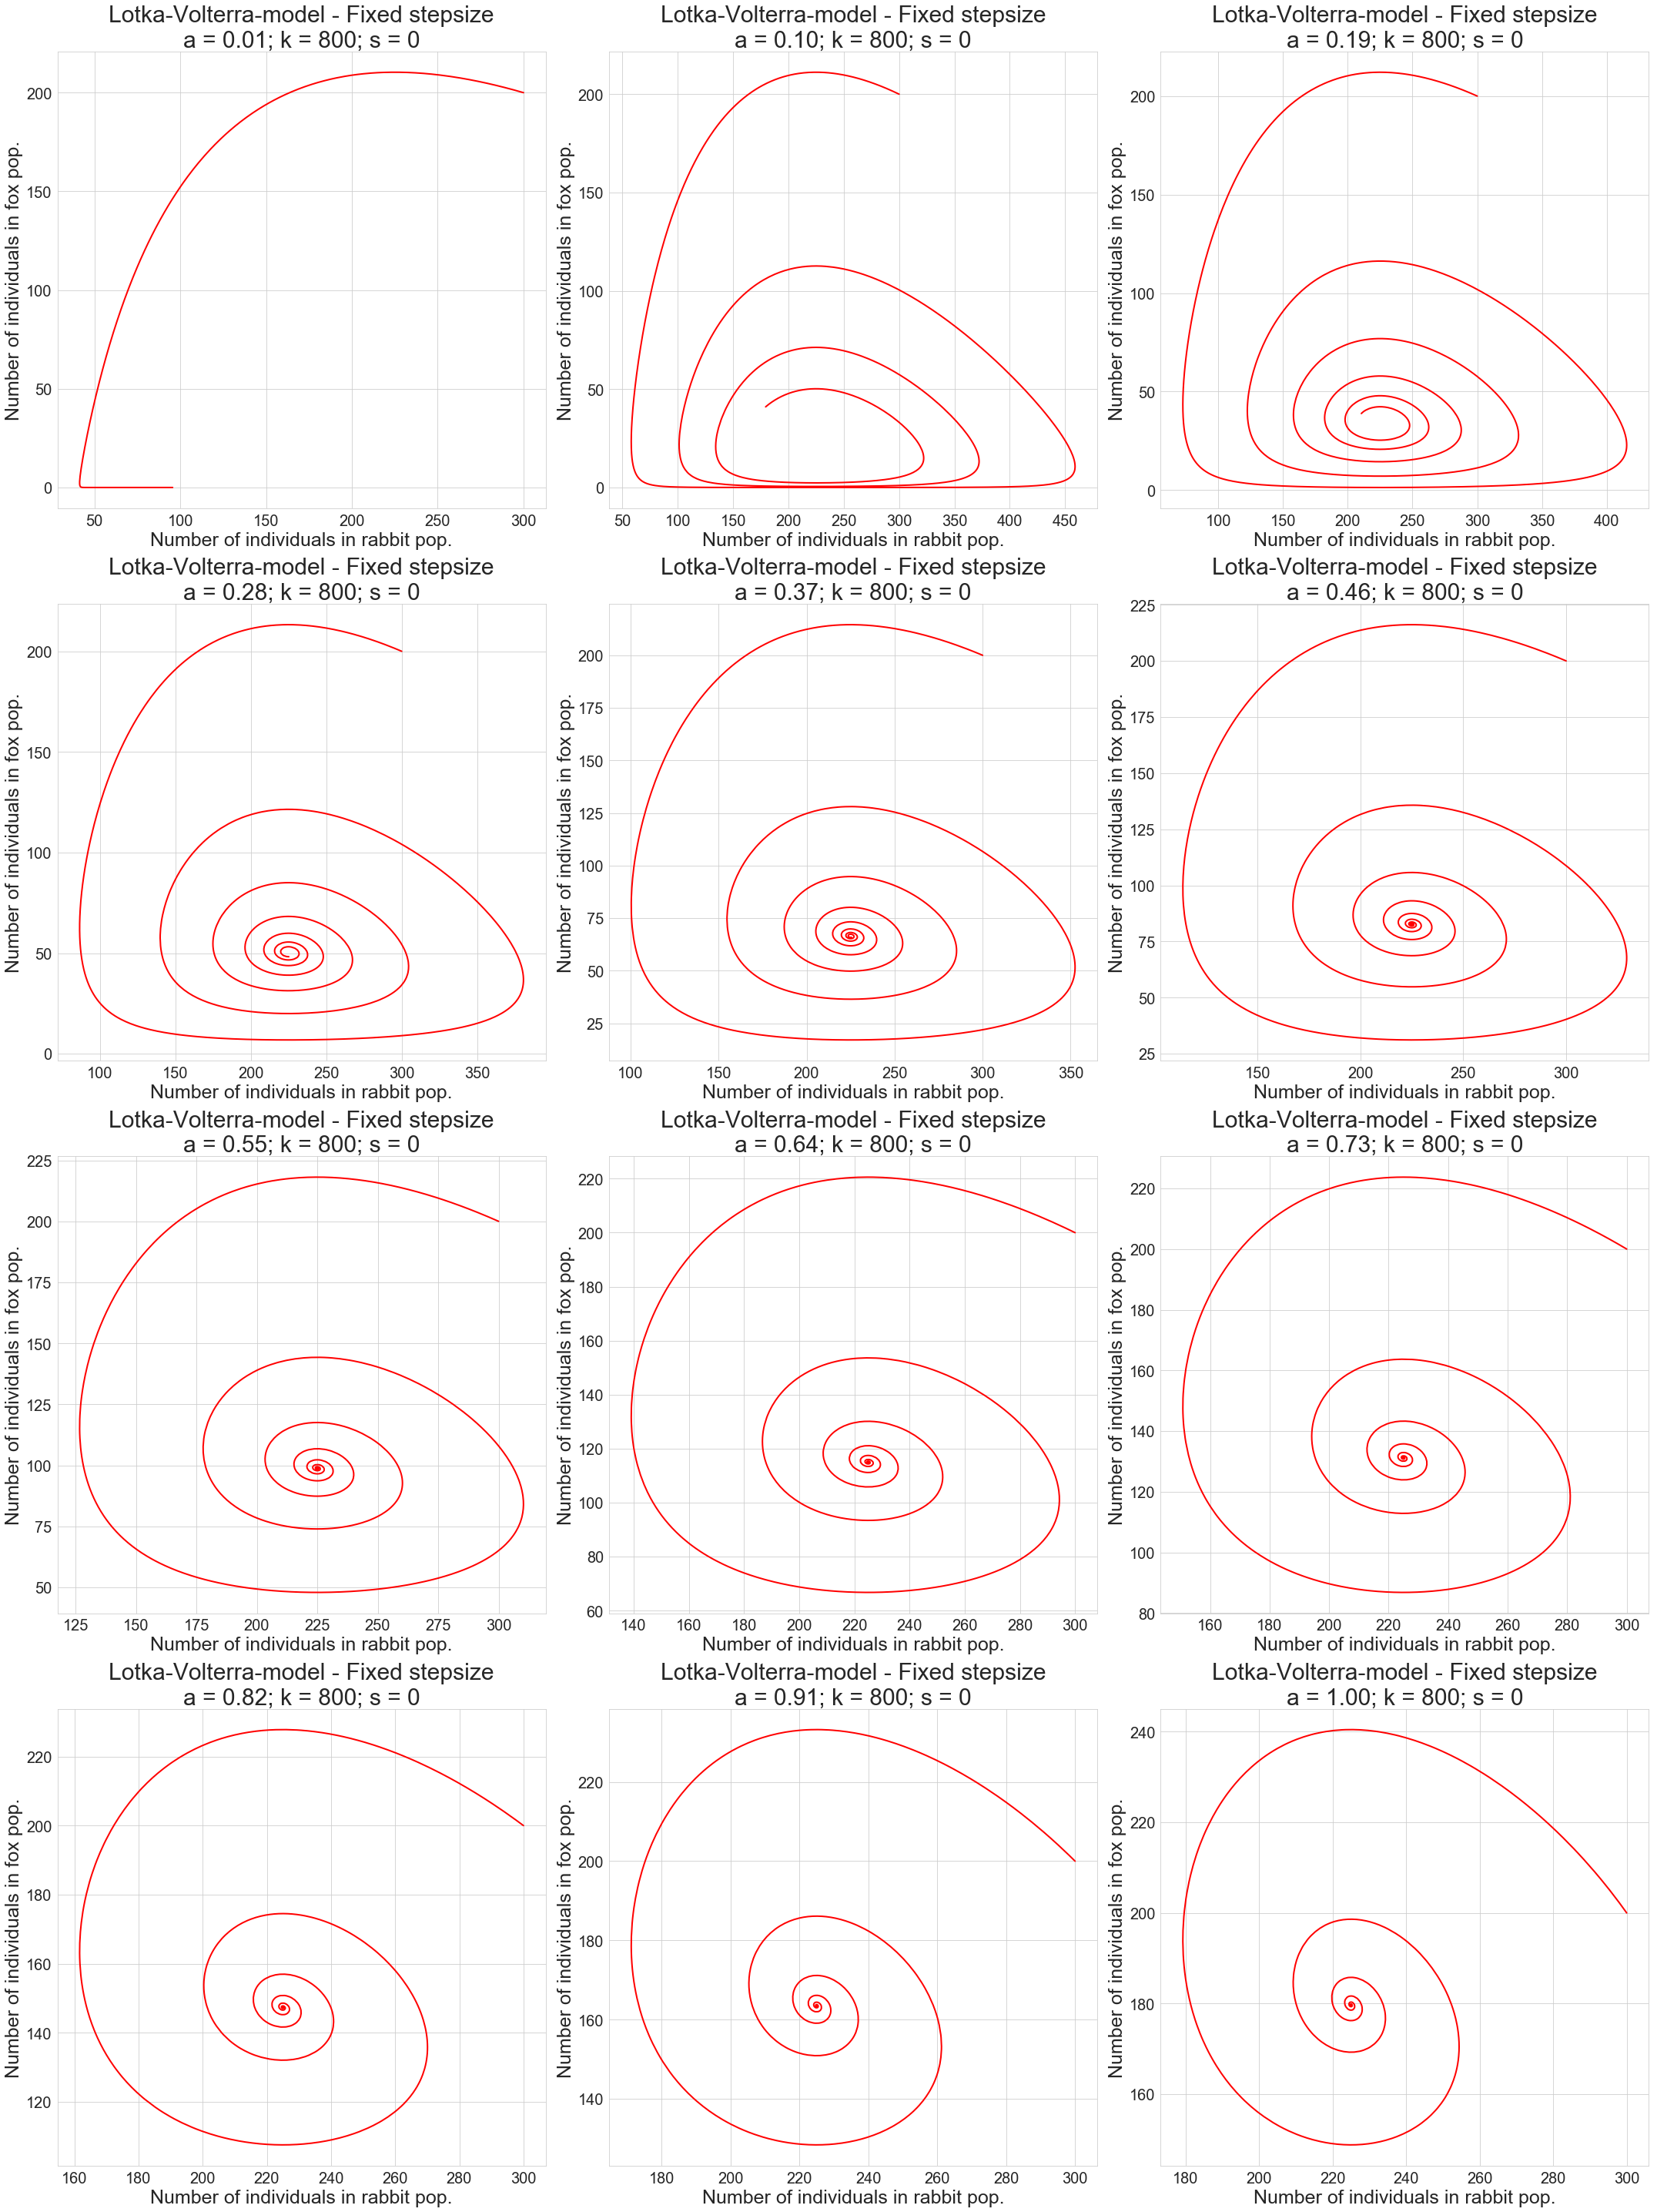

In [241]:
nrows = 4
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))

titlesize = 30
axislabelsize = 25
axisticksize = 20
legendsize = 20
scattersize = 10

places = [j/100 for j in range(0, 100, 9)]

count = 0
for i in places:

    n_0_r = 300
    n_0_f = 200
    k = 800
    s = 0
    a = 0.01 + i
    b = 0.004
    c = 0.004
    d = 0.9

    current_mode = mode_choose(file='popdin_lv', mode='fixed', odeint='rkck')
    os.system(current_mode)
    data_fixed_lv = np.genfromtxt('fixed.dat')
    
    axes[count//ncols][count%ncols].plot(data_fixed_lv[:,1], data_fixed_lv[:,2],
                                         color='red', lw=2)

    axes[count//ncols][count%ncols].set_title('Lotka-Volterra-model - Fixed stepsize\na = {0:.2f}; k = {1}; s = {2}'.format(a,
                                                                                                                            k,
                                                                                                                            s),
                                              fontsize=titlesize)
    
    axes[count//ncols][count%ncols].set_xlabel('Number of individuals in rabbit pop.', fontsize=axislabelsize)
    axes[count//ncols][count%ncols].set_ylabel('Number of individuals in fox pop.', fontsize=axislabelsize)

    axes[count//ncols][count%ncols].tick_params(axis='both', which='major', labelsize=axisticksize)
    
    count += 1

fig.tight_layout()
plt.savefig(image_path +
            'lv_model_drag_animals.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()